<a href="https://colab.research.google.com/github/oussamaJMAA/DataPreparation/blob/main/AmericanAgency2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas_profiling import ProfileReport
from scipy.stats import boxcox
%matplotlib inline
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [117]:
#Importing the Dataset
dataset = pd.read_excel("AgencyDataset.xlsx")
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [118]:
#Dropping the country column because it has one dominant category 
dataset.drop(['country'],axis=1,inplace=True)

In [119]:
#Number of zeroes in each column
for column_name in dataset:
    column = dataset[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  date  is :  0
Count of zeros in column  price  is :  49
Count of zeros in column  bedrooms  is :  2
Count of zeros in column  bathrooms  is :  2
Count of zeros in column  sqft_living  is :  0
Count of zeros in column  sqft_lot  is :  0
Count of zeros in column  floors  is :  0
Count of zeros in column  waterfront  is :  4567
Count of zeros in column  view  is :  4140
Count of zeros in column  condition  is :  0
Count of zeros in column  sqft_above  is :  0
Count of zeros in column  sqft_basement  is :  2745
Count of zeros in column  yr_built  is :  0
Count of zeros in column  yr_renovated  is :  2735
Count of zeros in column  street  is :  0
Count of zeros in column  city  is :  0
Count of zeros in column  statezip  is :  0


In [120]:
#Dropoing rows that has 0 in price , bedrooms and bathrooms  
dataset.drop(dataset[dataset['price']==0].index,inplace=True)
dataset.drop(dataset[dataset['bedrooms']==0].index,inplace=True)
dataset.drop(dataset[dataset['bathrooms']==0].index,inplace=True)


In [121]:
#print highly correlated variables
corr_features =[]

for i , r in dataset.corr().iterrows():
    k=0
    for j in range(len(r)):
        if i!= r.index[k]:
            if r.values[k] >=0.5:
                corr_features.append([i, r.index[k], r.values[k]])
        k += 1
corr_features

[['bedrooms', 'bathrooms', 0.545645206840986],
 ['bedrooms', 'sqft_living', 0.6016144987588385],
 ['bathrooms', 'bedrooms', 0.545645206840986],
 ['bathrooms', 'sqft_living', 0.7615444394303039],
 ['bathrooms', 'sqft_above', 0.6924940694812943],
 ['sqft_living', 'bedrooms', 0.6016144987588385],
 ['sqft_living', 'bathrooms', 0.7615444394303039],
 ['sqft_living', 'sqft_above', 0.875418268332467],
 ['floors', 'sqft_above', 0.521989982664378],
 ['sqft_above', 'bathrooms', 0.6924940694812943],
 ['sqft_above', 'sqft_living', 0.875418268332467],
 ['sqft_above', 'floors', 0.521989982664378]]

In [122]:
#removing highly correlated features that is above 0.8
feat =[]
for i in corr_features:
    if i[2] >= 0.8:
        feat.append(i[0])
        feat.append(i[1])
        
print(list(set(feat)))       

['sqft_living', 'sqft_above']


In [123]:
#Removing sqft_above because it's highly correlated with the sqft_living 
dataset.drop(['sqft_above'], axis=1, inplace=True)

In [9]:
dataset['city'].value_counts().sort_values(ascending=False).head(10)

Seattle        1560
Renton          291
Bellevue        281
Redmond         234
Kirkland        187
Issaquah        186
Kent            184
Auburn          175
Sammamish       171
Federal Way     145
Name: city, dtype: int64

In [124]:
not_null_features = dataset[[i for i in dataset.columns if 0 not in set(dataset[i])]].columns
not_null_features

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'yr_built', 'street', 'city', 'statezip'],
      dtype='object')

In [11]:
#one hot encoding on the city value 
top_10_cities = [city for city in dataset.city.value_counts().sort_values(ascending=False).head(10).index]
top_10_cities 

['Seattle',
 'Renton',
 'Bellevue',
 'Redmond',
 'Kirkland',
 'Issaquah',
 'Kent',
 'Auburn',
 'Sammamish',
 'Federal Way']

In [125]:
def one_hot_top_x(dataframe,feature,top_x_labels):
  for label in top_x_labels:
    dataframe[feature +'_'+label] = np.where(dataframe[feature]==label,1,0)

In [13]:
one_hot_top_x(dataset,"city",top_10_cities)

In [92]:
top_10_streets = [city for city in dataset.street.value_counts().sort_values(ascending=False).head(10).index]
top_10_streets

['2520 Mulberry Walk NE',
 '2500 Mulberry Walk NE',
 '2008 Yale Ave E',
 'Burke-Gilman Trail',
 '3510 S Holly St',
 '2358 Fairview Ave E',
 '19454 SE 27th Pl',
 '513 N 46th St',
 '5968 44th Ave S',
 '24345 35th Pl S']

In [126]:
one_hot_top_x(dataset,"street",top_10_streets)

In [127]:
city_mean_prices = dataset.groupby('city')['price'].mean()
dataset['city_encoded'] = dataset['city'].map(city_mean_prices)

In [128]:
#Transform the yr_renovated and year_built to a new column (renovation_age)
dataset['renov_age'] = np.abs(dataset['yr_renovated'] - dataset['yr_built'])
dataset['renov_age'] = dataset.renov_age.apply(lambda x: x if len(str(int(x)))==2 else 0.0)

In [129]:
#Transforming statezip to numerical type
dataset['statezip'] = dataset['statezip'].str.strip('WA').astype('float')
dataset['statezip'].dtype

dtype('float64')

In [130]:
#remove unwanted columns like yr_built, date ,yr_renovated
dataset.drop(['date', 'yr_built', 'yr_renovated','street','city'], axis=1, inplace=True)
dataset.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,...,street_2008 Yale Ave E,street_Burke-Gilman Trail,street_3510 S Holly St,street_2358 Fairview Ave E,street_19454 SE 27th Pl,street_513 N 46th St,street_5968 44th Ave S,street_24345 35th Pl S,city_encoded,renov_age
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,0,...,0,0,0,0,0,0,0,0,420392.364047,50.0
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,280,...,0,0,0,0,0,0,0,0,583967.523099,0.0
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,0,...,0,0,0,0,0,0,0,0,441880.990543,0.0
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,862255.052017,0.0
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,800,...,0,0,0,0,0,0,0,0,664965.780656,16.0


In [131]:
#Dropping rows that have living & basement & above surfaces greater than the house surface 
dataset.drop(dataset.index[(dataset['sqft_living']>dataset['sqft_lot'])|(dataset['sqft_basement']>dataset['sqft_lot'])], inplace = True)

In [132]:
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,...,street_2008 Yale Ave E,street_Burke-Gilman Trail,street_3510 S Holly St,street_2358 Fairview Ave E,street_19454 SE 27th Pl,street_513 N 46th St,street_5968 44th Ave S,street_24345 35th Pl S,city_encoded,renov_age
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,0,...,0,0,0,0,0,0,0,0,420392.364047,50.0
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,280,...,0,0,0,0,0,0,0,0,583967.523099,0.0
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,0,...,0,0,0,0,0,0,0,0,441880.990543,0.0
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,862255.052017,0.0
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,800,...,0,0,0,0,0,0,0,0,664965.780656,16.0


In [170]:
df = dataset.copy()

In [158]:
highest_allowed = dataset['price'].mean() + 3*dataset['price'].std()
lowest_allowed = dataset['price'].mean() - 3*dataset['price'].std()
df2= df[(df['price'] > highest_allowed) | (df['price'] < lowest_allowed)]

In [161]:
new_df = df[(df['price'] < highest_allowed) & (df['price'] >lowest_allowed )]
new_df.shape

(4347, 23)

In [163]:
# df['price'] = np.where(df['price']>highest_allowed,highest_allowed,df['price'])
# df['price'] = np.where(df['price']<lowest_allowed,lowest_allowed,df['price'])


(4378,)

skewness of price is 24.88244835637927


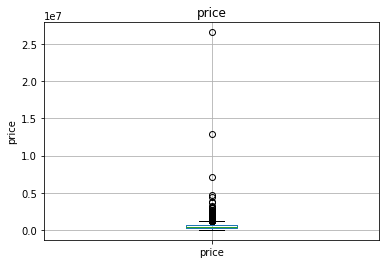

skewness of bedrooms is 0.4612490753593932


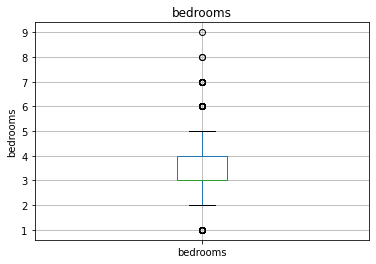

skewness of bathrooms is 0.6243791332030871


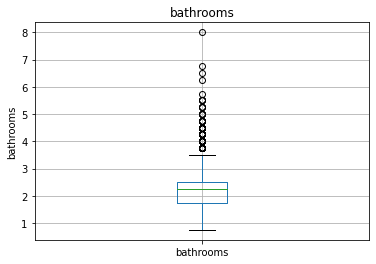

skewness of sqft_living is 1.6974967168113668


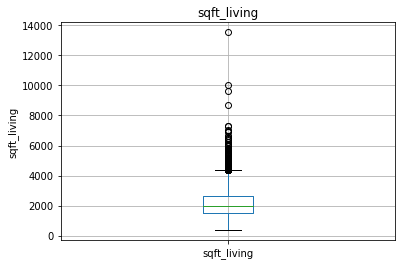

skewness of sqft_lot is 11.163640328436136


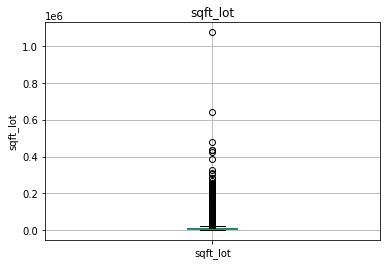

skewness of floors is 0.42563757331794055


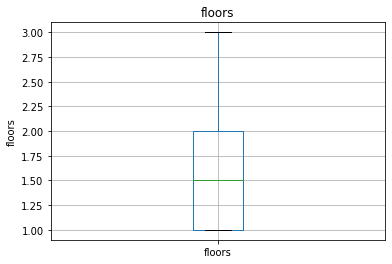

skewness of sqft_basement is 1.6287316621138856


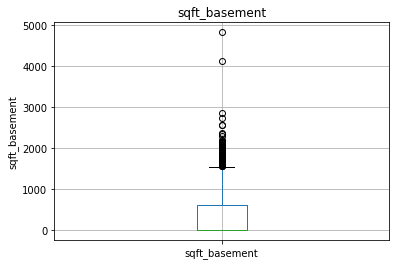

skewness of statezip is 0.4964003451127496


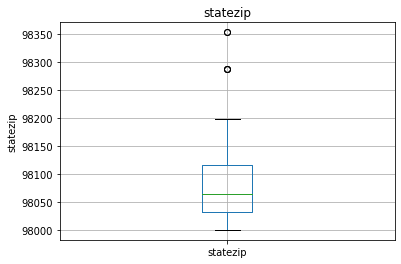

skewness of city_encoded is 1.992627775052593


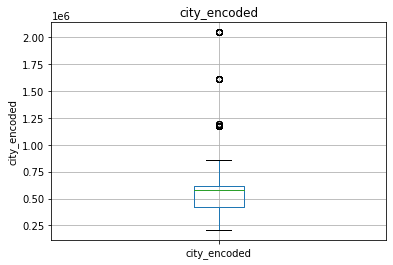

skewness of renov_age is 1.3273501707805622


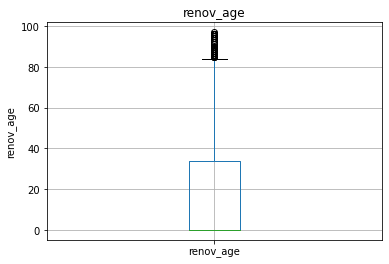

In [184]:
#Visualizing the outliers
for feature in dataset[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','sqft_basement', 'statezip','city_encoded','renov_age']]:
    dataset.boxplot(column=feature)
    print(f"skewness of {feature} is {dataset[feature].skew()}")
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [185]:
df3 = dataset.copy()

In [187]:
#Removing outliers 
for i in df3[['price', 'sqft_living', 'sqft_lot','sqft_basement','city_encoded','renov_age']]:
  low, high = df3[i].quantile([0.05, 0.95])
  df3[df3[i]<low]= low
  df[df[i]>high] = high
  print(f"skew of the {i} is {df[i].skew()}")



skew of the price is 2.6794783581126165
skew of the sqft_living is 2.6794784592509653
skew of the sqft_lot is 2.679475306212061
skew of the sqft_basement is 1.855084910560965
skew of the city_encoded is 2.6794787895002847
skew of the renov_age is 2.6760061401983815


 price skewness is 0.4371856506125701


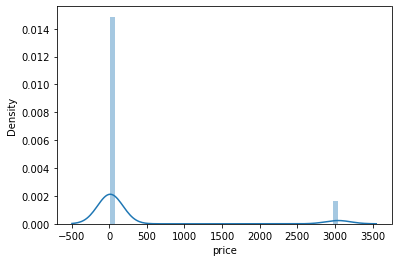

 sqft_living skewness is 1.8142739933778689


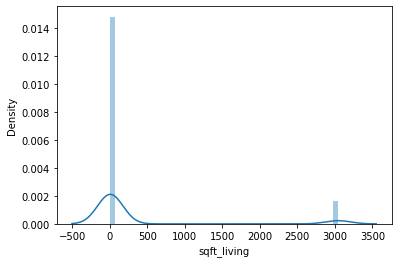

 sqft_lot skewness is 1.0010310233051423


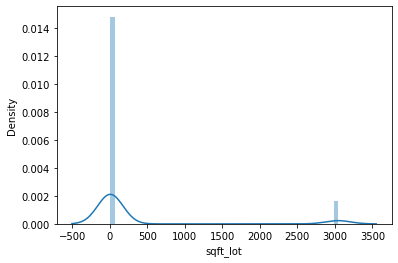

 floors skewness is 1.9424886921071296


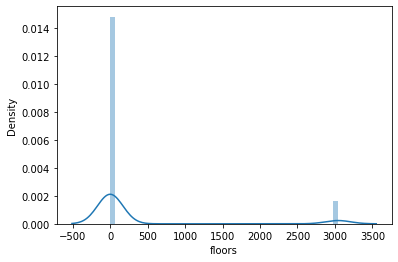

 statezip skewness is 2.0302253753978055


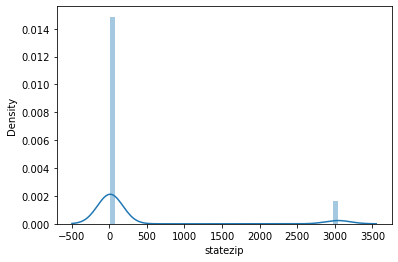

 city_encoded skewness is -0.4911442691035981


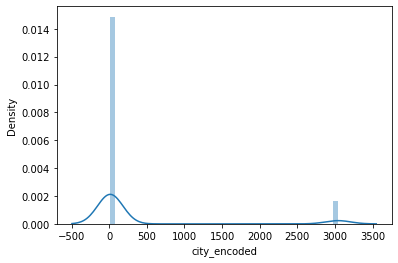

In [188]:
for feature in df3[['price', 'sqft_living', 'sqft_lot', 'floors', 'statezip','city_encoded']]:
    df3[feature] = np.log(df3[feature])
    print(f" {feature} skewness is {df3[feature].skew()}")
    sns.distplot(df[feature])
    plt.show()

In [114]:
dataset.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,statezip,street_2520 Mulberry Walk NE,...,street_2008 Yale Ave E,street_Burke-Gilman Trail,street_3510 S Holly St,street_2358 Fairview Ave E,street_19454 SE 27th Pl,street_513 N 46th St,street_5968 44th Ave S,street_24345 35th Pl S,city_encoded,renov_age
count,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,...,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,4378.0,4378.000000,4378.000000,4378.000000,4378.000000
mean,3.418456,2.143330,7.582399,9.071306,0.330632,0.006624,0.236409,3.465281,11.493521,0.000457,...,0.000228,0.000457,0.000457,0.000457,0.000457,0.0,0.000457,0.000457,13.175369,16.704431
std,0.902790,0.779794,0.430620,0.848634,0.339364,0.081127,0.766311,0.681225,0.000543,0.021371,...,0.015113,0.021371,0.021371,0.021371,0.021371,0.0,0.021371,0.021371,0.327812,25.395530
min,1.000000,0.750000,5.913503,6.725034,0.000000,0.000000,0.000000,1.000000,11.492733,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,12.241864,0.000000
25%,3.000000,1.750000,7.299797,8.575933,0.000000,0.000000,0.000000,3.000000,11.493059,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,12.948944,0.000000
50%,3.000000,2.250000,7.600902,8.965845,0.405465,0.000000,0.000000,3.000000,11.493386,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,13.277601,0.000000
75%,4.000000,2.500000,7.874739,9.327101,0.693147,0.000000,0.000000,4.000000,11.493916,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,13.329235,33.750000
max,9.000000,8.000000,9.513404,13.887104,1.098612,1.000000,4.000000,5.000000,11.496328,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,14.531670,97.000000


In [189]:
X = df3.drop(['price'],axis=1)
y= df3['price']
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,statezip,...,street_2008 Yale Ave E,street_Burke-Gilman Trail,street_3510 S Holly St,street_2358 Fairview Ave E,street_19454 SE 27th Pl,street_513 N 46th St,street_5968 44th Ave S,street_24345 35th Pl S,city_encoded,renov_age
count,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,4378.00000,4378.000000,4378.000000,4378.000000,...,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000,4378.000000
mean,29388.476436,29387.397062,8.369186,9.582217,2.137287,29385.440118,29385.66031,29388.375934,29692.808094,11.596885,...,29385.433951,29385.434408,29385.433951,29385.433951,29385.434408,29385.433951,29385.433951,29385.434179,13.042177,29398.070543
std,70328.630620,70329.081709,1.631830,1.346266,4.226533,70329.899548,70329.80753,70328.672620,70202.879944,0.248610,...,70329.902125,70329.901934,70329.902125,70329.902125,70329.901934,70329.902125,70329.902125,70329.902030,0.472156,70324.624655
min,1.000000,0.750000,7.073270,7.140453,0.000000,0.000000,0.00000,1.000000,0.000000,11.492733,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.069118,0.000000
25%,3.000000,2.000000,7.489971,8.699515,0.000000,0.000000,0.00000,3.000000,0.000000,11.493070,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.736750,0.000000
50%,4.000000,2.500000,7.757906,9.104980,0.693147,0.000000,0.00000,3.000000,300.000000,11.493488,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.277601,0.000000
75%,4.000000,3.000000,8.112976,10.068779,0.693147,0.000000,0.00000,4.000000,1000.000000,11.494110,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.303633,48.000000
max,210000.000000,210000.000000,12.254863,13.887104,12.254863,210000.000000,210000.00000,210000.000000,210000.000000,12.254863,...,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,210000.000000,14.531670,210000.000000


In [47]:
y.describe()

count    4378.000000
mean       13.064183
std         0.548320
min         8.961879
25%        12.691580
50%        13.049793
75%        13.399995
max        17.096046
Name: price, dtype: float64

In [191]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, BayesianRidge,RANSACRegressor,HuberRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [190]:
sc = ('Scaler', StandardScaler())
est =[]
est.append(('LinearRegression', Pipeline([sc, ('LinearRegression', LinearRegression())])))
est.append(('Ridge', Pipeline([sc, ('Ridge', Ridge())])))
est.append(('Lasso', Pipeline([sc, ('Lasso', Lasso())])))
est.append(('BayesianRidge', Pipeline([sc, ('BayesianRidge', BayesianRidge())])))
est.append(('ElasticNet', Pipeline([sc,('Elastic', ElasticNet())])))
est.append(('SGD', Pipeline([sc,('SGD', SGDRegressor())])))
est.append(('Huber', Pipeline([sc,('Huber', HuberRegressor())])))
est.append(('RANSAC', Pipeline([sc,('RANSAC', RANSACRegressor())])))
est.append(('GradientBoosting', Pipeline([sc,('GradientBoosting',GradientBoostingRegressor())])))
est.append(('AdaBoost', Pipeline([sc, ('AdaBoost', AdaBoostRegressor())])))
est.append(('ExtraTree', Pipeline([sc,('ExtraTrees', ExtraTreesRegressor())])))
est.append(('RandomForest', Pipeline([sc,('RandomForest', RandomForestRegressor())]))) 
est.append(('Bagging', Pipeline([sc,('Bagging', BaggingRegressor())])))
est.append(('KNeighbors', Pipeline([sc,('KNeighbors', KNeighborsRegressor())])))
est.append(('DecisionTree', Pipeline([sc,('DecisionTree', DecisionTreeRegressor())])))
est.append(('XGB', Pipeline([sc,('XGB', XGBRegressor())])))

In [192]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=0)

In [193]:
import warnings
warnings.filterwarnings(action='ignore')
seed = 4
splits = 7
score = 'r2'
models_score =[]
for i in est:
    kfold = KFold(n_splits=splits)
    results = cross_val_score(i[1], x_train, y_train, cv=kfold, scoring=score)
    models_score.append({i[0] : '{} +/- {}'.format(results.mean(), results.std())})
models_score

[01:34:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:34:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:34:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:34:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:34:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:34:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:34:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[{'LinearRegression': '0.8174295358589131 +/- 0.011801921556834306'},
 {'Ridge': '0.7882107324515968 +/- 0.015463210506611327'},
 {'Lasso': '-0.002494517787612116 +/- 0.0017471282448851316'},
 {'BayesianRidge': '0.7915648173868729 +/- 0.016680804725796472'},
 {'ElasticNet': '-0.002494517787612116 +/- 0.0017471282448851316'},
 {'SGD': '0.742485220746695 +/- 0.018055379830487217'},
 {'Huber': '0.7893469472997019 +/- 0.015200005695297798'},
 {'RANSAC': '-467063742474.486 +/- 1144067846419.1626'},
 {'GradientBoosting': '0.8624245119535628 +/- 0.012136270925683245'},
 {'AdaBoost': '0.753396574354188 +/- 0.013137977205789233'},
 {'ExtraTree': '0.8454331881380419 +/- 0.013223733726286938'},
 {'RandomForest': '0.8528820424417214 +/- 0.012239832986139117'},
 {'Bagging': '0.8355618134674968 +/- 0.019087543775370856'},
 {'KNeighbors': '0.7810640538964323 +/- 0.01921035637490533'},
 {'DecisionTree': '0.7102851165657776 +/- 0.04727490347699343'},
 {'XGB': '0.8557072011446909 +/- 0.01142717807002887

In [113]:
models_score

[{'LinearRegression': '0.6994129980721644 +/- 0.045487143806341175'},
 {'Ridge': '0.6994163401803648 +/- 0.045486798476420454'},
 {'Lasso': '-0.0041070570682880825 +/- 0.0051167251392057606'},
 {'BayesianRidge': '0.6994271425352465 +/- 0.045476461131668075'},
 {'ElasticNet': '-0.0041070570682880825 +/- 0.0051167251392057606'},
 {'SGD': '-16305.584479546307 +/- 22103.832229561966'},
 {'Huber': '0.6994536313003391 +/- 0.047202261014677595'},
 {'RANSAC': '-4.362792159236914e+22 +/- 1.0686614643945613e+23'},
 {'GradientBoosting': '0.7494371417333626 +/- 0.05861597981920896'},
 {'AdaBoost': '0.507438439499205 +/- 0.03678287596803669'},
 {'ExtraTree': '0.7188610306065577 +/- 0.057222722155250656'},
 {'RandomForest': '0.7344620853470657 +/- 0.05238542564800443'},
 {'Bagging': '0.7129100231378394 +/- 0.05141357126264382'},
 {'KNeighbors': '0.6462868380351 +/- 0.044585164416836055'},
 {'DecisionTree': '0.5105299920943119 +/- 0.07560068697369764'},
 {'XGB': '0.7527757267993823 +/- 0.055653725545